# NEURON simulation environment

> The NEURON simulation environment is used in laboratories and classrooms around the world for building and using computational models of neurons and networks of neurons.

https://www.neuron.yale.edu/neuron/

**Kernel**: Python 3 (system-wide)

## CoCalc Setup

**important** unset `DISPLAY`, otherwise gui is loading and neron crashes

In [1]:
import os
if 'DISPLAY' in os.environ:
    del os.environ['DISPLAY']

Add the library location to the search path

In [2]:
import sys
sys.path.insert(0, '/usr/local/nrn/lib/python/')

## First Steps

see https://neuron.yale.edu/neuron/static/docs/neuronpython/firststeps.html

In [3]:
from neuron import h, __version__
__version__

'7.7.2'

In [4]:
soma = h.Section(name='soma')

In [5]:
h.psection()

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=1}
}


1.0

In [6]:
soma.insert('pas')

soma

In [7]:
print("type(soma) = {}".format(type(soma)))
print("type(soma(0.5)) ={}".format(type(soma(0.5))))

type(soma) = <class 'nrn.Section'>
type(soma(0.5)) =<class 'nrn.Segment'>


In [8]:
mech = soma(0.5).pas
print(dir(mech))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'e', 'g', 'i', 'is_ion', 'name', 'segment']


In [9]:
print(mech.g)

0.001


In [10]:
print(soma(0.5).pas.g)

0.001


In [11]:
asyn = h.AlphaSynapse(soma(0.5))

In [12]:
print("asyn.e = {}".format(asyn.e))
print("asyn.gmax = {}".format(asyn.gmax))
print("asyn.onset = {}".format(asyn.onset))
print("asyn.tau = {}".format(asyn.tau))

asyn.e = 0.0
asyn.gmax = 0.0
asyn.onset = 0.0
asyn.tau = 0.1


In [13]:
asyn.onset = 20
asyn.gmax = 1

In [14]:
h.psection()

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=1}
	insert pas { g_pas=0.001 e_pas=-70}
	insert AlphaSynapse { onset=20 tau=0.1 gmax=1 e=0}
}


1.0

In [15]:
v_vec = h.Vector()  # Membrane potential vector
t_vec = h.Vector()  # Time stamp vector
v_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

Vector[1]

In [16]:
h.load_file('stdrun.hoc')
h.tstop = 40.0
h.run()

0.0

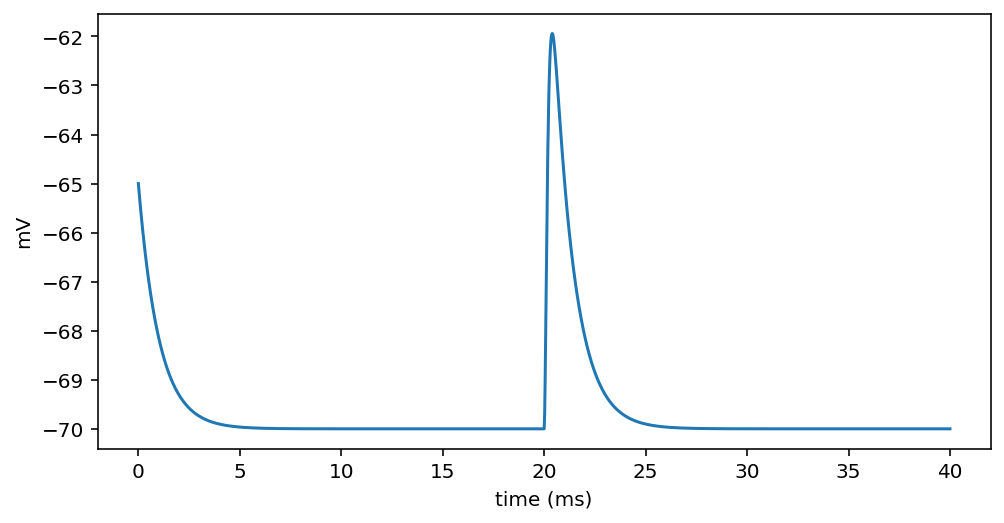

In [17]:
from matplotlib import pyplot
pyplot.figure(figsize=(8, 4))  # Default figsize is (8,6)
pyplot.plot(t_vec, v_vec)
pyplot.xlabel('time (ms)')
pyplot.ylabel('mV')
pyplot.show()